#  Data cleaning 

In [1]:
import pandas as pd

# Load the data
file_path = r"C:\Users\Nada\Downloads\tripinfo (8).csv"  # Replace with the correct path
data = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = [
    "tripinfos [xmlns:xsi]",
    "tripinfos [xsi:noNamespaceSchemaLocation]",
    "tripinfo [vaporized]"
]
cleaned_data = data.drop(columns=columns_to_drop)

# Rename columns for clarity
cleaned_data.columns = [
    col.split(" [")[-1].replace("]", "").replace(" ", "_")
    for col in cleaned_data.columns
]

# Check for missing values
missing_summary = cleaned_data.isnull().sum()
print("Missing Values Summary:\n", missing_summary)

# Ensure no missing values remain
assert cleaned_data.isnull().sum().sum() == 0, "Missing values detected!"

# Display the first few rows of cleaned data
cleaned_data


Missing Values Summary:
 arrivalLane     0
arrivalPos      0
arrivalSpeed    0
arrival         0
departDelay     0
departLane      0
departPos       0
departSpeed     0
depart          0
devices         0
duration        0
id              0
rerouteNo       0
routeLength     0
speedFactor     0
stopTime        0
timeLoss        0
vType           0
waitingCount    0
waitingTime     0
dtype: int64


,arrivalLane,arrivalPos,arrivalSpeed,arrival,departDelay,departLane,departPos,departSpeed,depart,devices,duration,id,rerouteNo,routeLength,speedFactor,stopTime,timeLoss,vType,waitingCount,waitingTime
0,7546429#11_0,4.67,12.43,82.0,0.87,239353258#1_0,5.1,0.0,44.0,tripinfo_veh140 routing_veh140,38.0,veh140,1,410.67,0.96,0.0,5.14,veh_passenger,0,0.0
1,7515979#16_0,24.01,8.79,133.0,0.98,7516981#12_0,5.1,0.0,13.0,tripinfo_veh39 routing_veh39,120.0,veh39,1,1213.41,1.10,0.0,17.95,veh_passenger,1,1.0
2,430014571#0_0,3.92,11.87,136.0,0.60,7331866#0_0,5.1,7.3,16.0,tripinfo_veh50 routing_veh50,120.0,veh50,1,1049.33,0.88,0.0,13.66,veh_passenger,0,0.0
3,27628545#1_0,38.56,13.87,148.0,0.84,7332973#3_0,5.1,0.0,7.0,tripinfo_veh20 routing_veh20,141.0,veh20,1,1815.08,1.01,0.0,17.99,veh_passenger,0,0.0
4,-7511774#9_0,35.98,7.74,157.0,0.97,-7511797#9_0,5.1,0.0,25.0,tripinfo_veh78 routing_veh78,132.0,veh78,1,967.77,0.96,0.0,40.31,veh_passenger,2,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,7333528#1_0,24.17,12.70,2494.0,0.89,-7510459#1_0,5.1,0.0,2127.0,tripinfo_veh6901 routing_veh6901,367.0,veh6901,1,2295.76,0.95,0.0,145.90,veh_passenger,2,73.0
3343,7519637#2_0,1.37,6.44,2496.0,0.46,7329666#3_0,5.1,0.0,1442.0,tripinfo_veh4679 routing_veh4679,1054.0,veh4679,1,11291.30,0.91,0.0,394.04,veh_passenger,13,231.0
3344,-7510696#11_0,0.20,7.41,2496.0,0.59,-275095908#1_0,7.2,0.0,2180.0,tripinfo_truck4716 routing_truck4716,316.0,truck4716,1,1946.77,0.97,0.0,130.12,truck_truck,3,94.0
3345,7332067#6_0,39.85,6.42,2498.0,0.48,-7546659_0,5.1,0.0,828.0,tripinfo_veh2686 routing_veh2686,1670.0,veh2686,1,14586.84,0.90,0.0,594.05,veh_passenger,20,317.0


In [2]:
#to know the number of rows and columns
cleaned_data.shape

(3347, 20)

#  Descriptive Statistics

In [3]:
# Generate descriptive statistics for numeric columns
print(cleaned_data.describe())

# Analyze categorical columns (if any exist)
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col} unique values:\n{cleaned_data[col].value_counts()}\n")


        arrivalPos  arrivalSpeed      arrival  departDelay    departPos  \
count  3347.000000   3347.000000  3347.000000  3347.000000  3347.000000   
mean     57.744870      9.717189  1510.302659     3.929304     6.064703   
std     149.849478      3.991151   625.714196    22.249524     2.993376   
min       0.100000      0.000000    82.000000     0.000000     0.100000   
25%      12.290000      7.560000   993.000000     0.240000     5.100000   
50%      29.470000      8.220000  1573.000000     0.500000     5.100000   
75%      55.480000     12.245000  2054.500000     0.790000     5.100000   
max    4235.660000     32.860000  2498.000000   249.930000    12.100000   

       departSpeed       depart     duration    rerouteNo   routeLength  \
count  3347.000000  3347.000000  3347.000000  3347.000000   3347.000000   
mean      1.380986   959.498058   550.804601     1.003884   5545.828566   
std       3.975382   627.452690   336.752675     0.096175   3997.008541   
min       0.000000     0

In [4]:
#check on "id" duplicates
cleaned_data['id'].duplicated().sum()

0

In [5]:
#Check for Duplicates
duplicates = cleaned_data[cleaned_data.duplicated()]
print("Number of duplicate rows:", len(duplicates))
if not duplicates.empty:
    print(duplicates)

Number of duplicate rows: 0


In [6]:
#  drop id column because its a unique identifier number
cleaned_data=cleaned_data.drop(columns=['id'])

# Visualizing Distributions of Numeric Columns

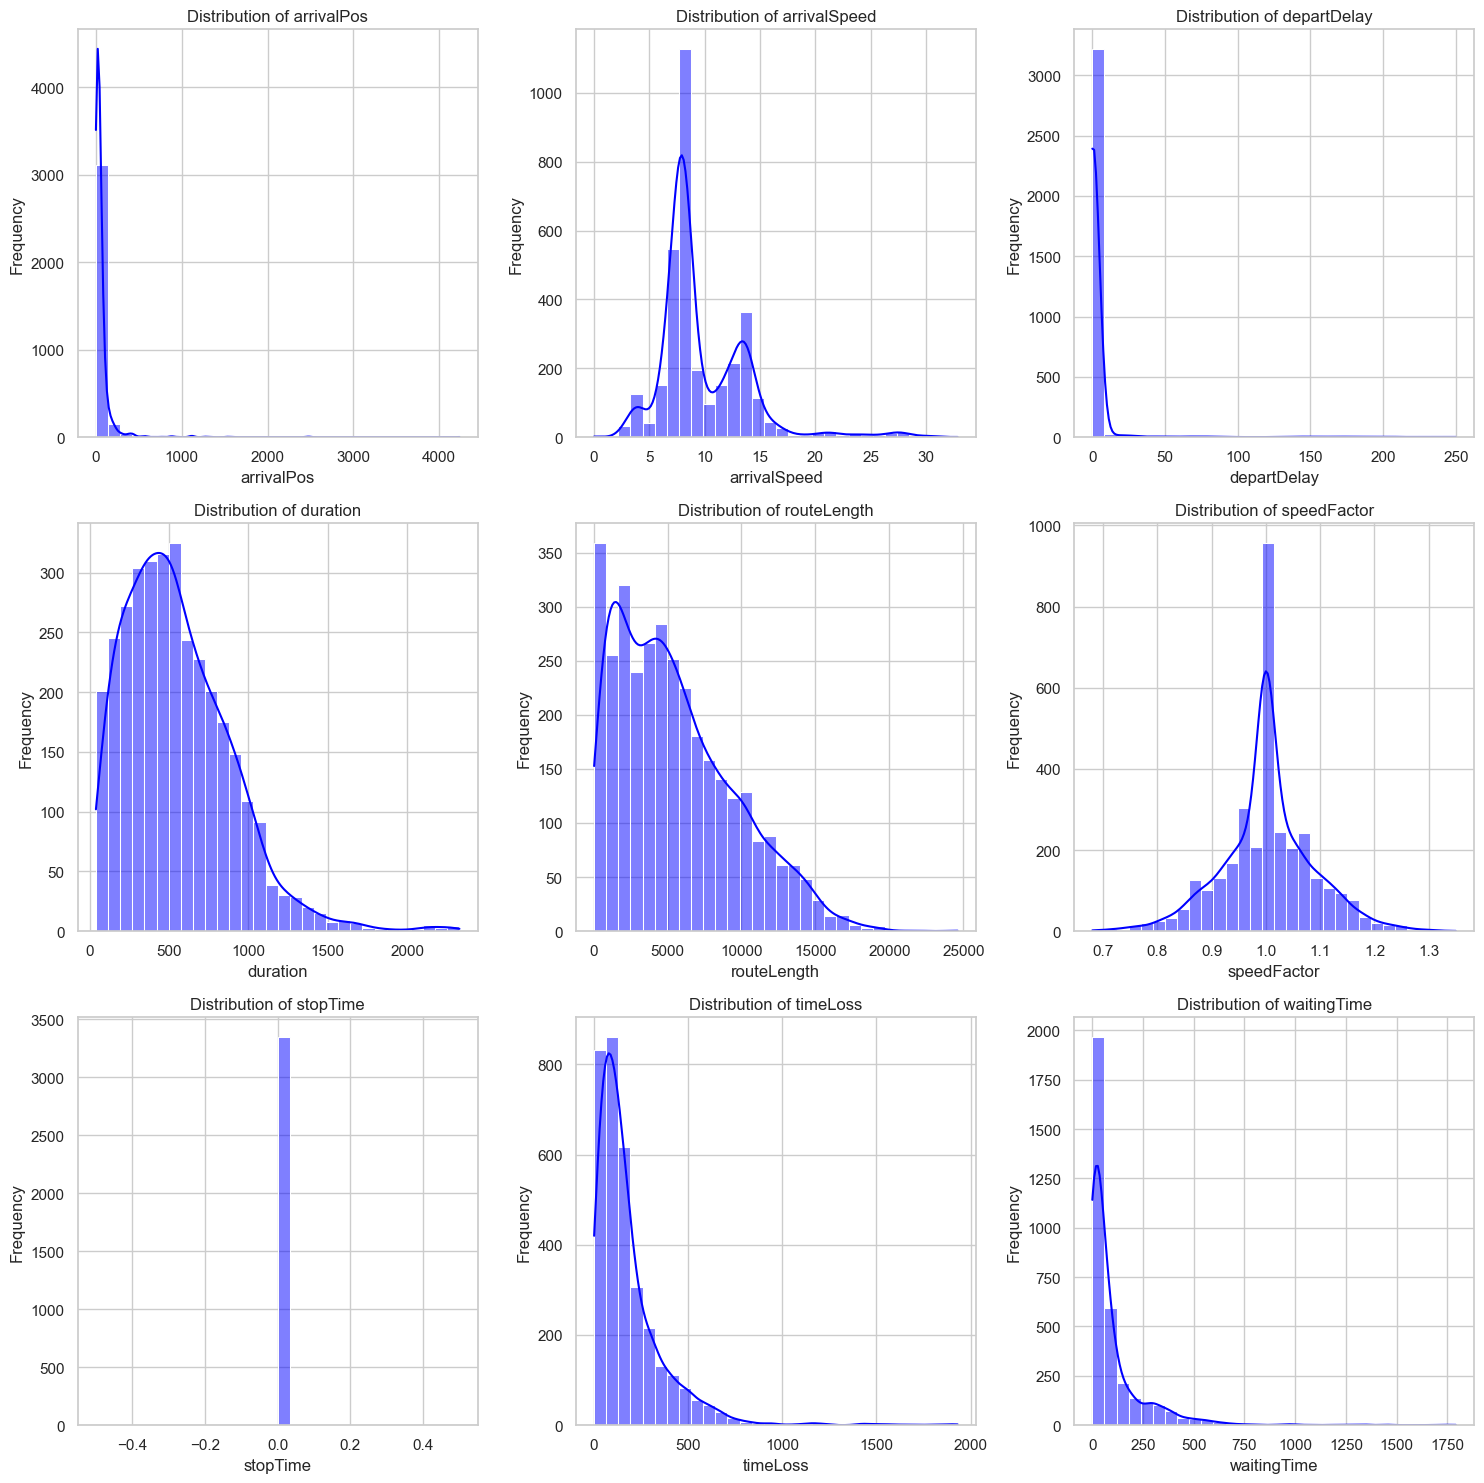

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric columns
numeric_columns = [
    "arrivalPos", "arrivalSpeed", "departDelay", 
    "duration", "routeLength", "speedFactor", 
    "stopTime", "timeLoss", "waitingTime"
]

# Set visualization style
sns.set(style="whitegrid")

# Create subplots for distributions
fig, axes = plt.subplots(len(numeric_columns) // 3, 3, figsize=(15, 15))
axes = axes.flatten()

# Plot histograms with KDE
for i, col in enumerate(numeric_columns):
    sns.histplot(cleaned_data[col], kde=True, ax=axes[i], color="blue", bins=30)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Correlation Analysis

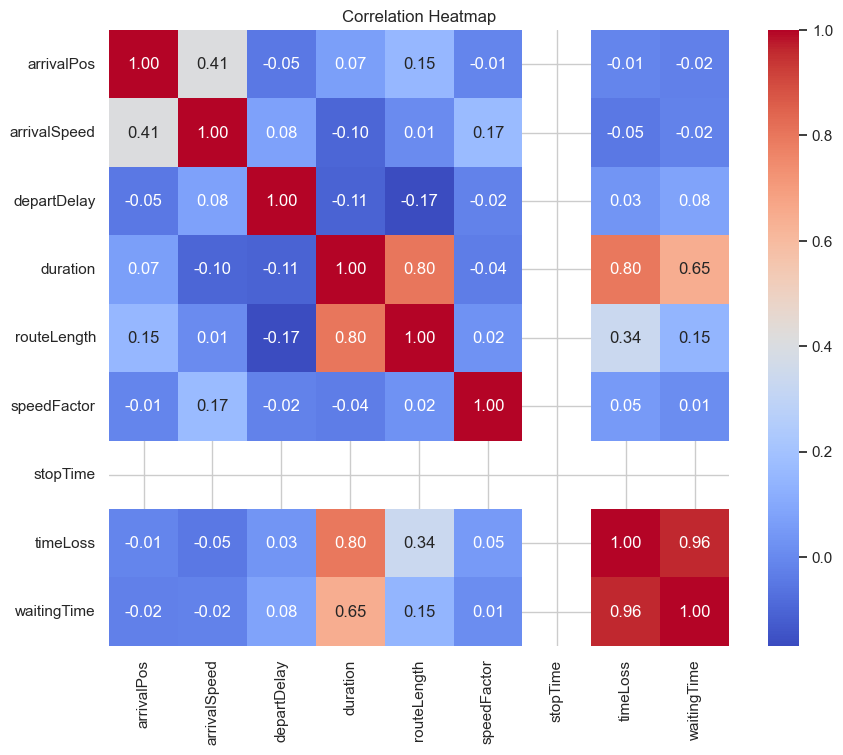

In [8]:

correlation_matrix = cleaned_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\Nada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


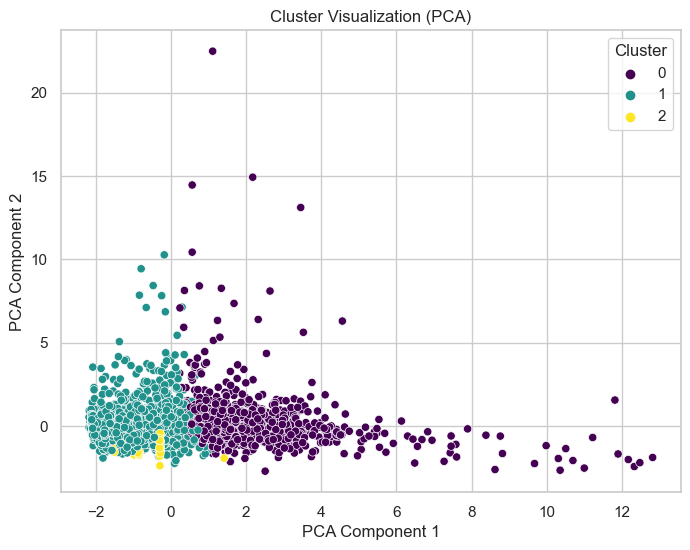

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data[numeric_columns])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_data["Cluster"] = kmeans.fit_predict(scaled_data)

# Visualize clusters (e.g., using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cleaned_data["Cluster"], palette="viridis")
plt.title("Cluster Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


# Check on Outliers

<Axes: >

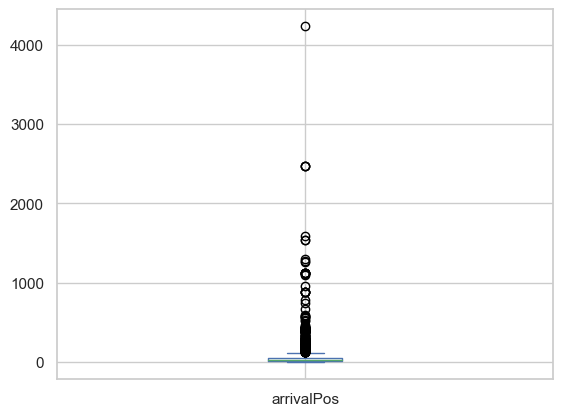

In [10]:
cleaned_data['arrivalPos'].plot(kind='box')


Lower bound: -52.495 Upper bound: 120.26499999999999


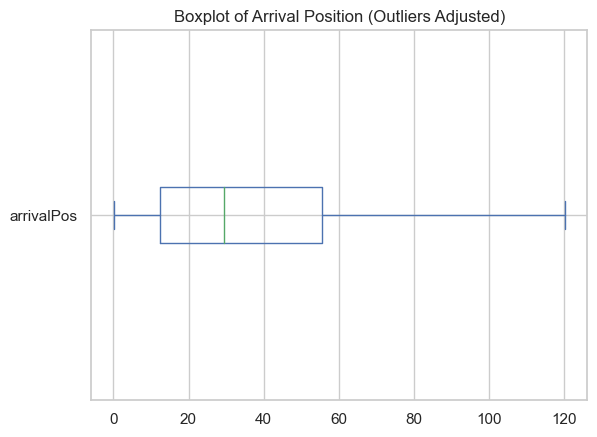

In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = cleaned_data['arrivalPos'].quantile(0.25)
q3 = cleaned_data['arrivalPos'].quantile(0.75)

# Compute the IQR
iqr = q3 - q1

# Define upper and lower bounds
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)


print("Lower bound:", lower, "Upper bound:", upper)

# Replace outliers with the respective bounds
cleaned_data.loc[cleaned_data['arrivalPos'] > upper, 'arrivalPos'] = upper
cleaned_data.loc[cleaned_data['arrivalPos'] < lower, 'arrivalPos'] = lower

# Plot the cleaned data
cleaned_data['arrivalPos'].plot(kind='box', vert=False)
plt.title("Boxplot of Arrival Position (Outliers Adjusted)")
plt.show()



<Axes: >

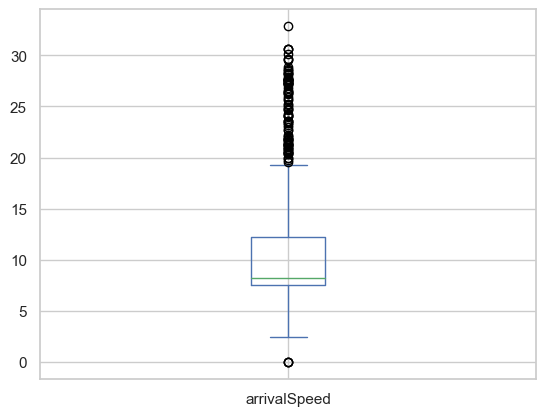

In [12]:
cleaned_data['arrivalSpeed'].plot(kind='box')


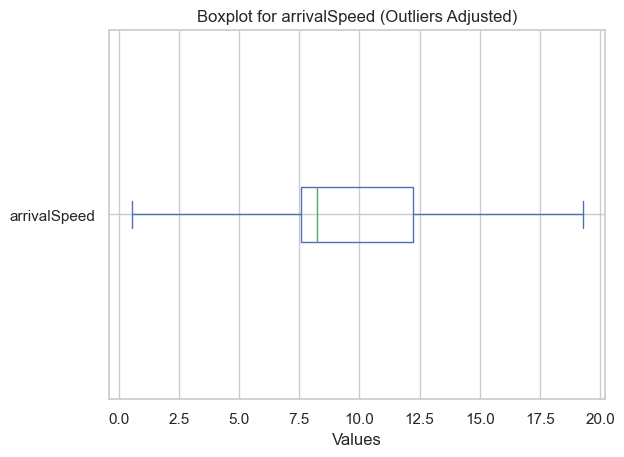

In [13]:
# Calculate Q1, Q3, and IQR for arrivalSpeed
q1 = cleaned_data['arrivalSpeed'].quantile(0.25)
q3 = cleaned_data['arrivalSpeed'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

# Replace outliers in arrivalSpeed
cleaned_data.loc[cleaned_data['arrivalSpeed'] > upper, 'arrivalSpeed'] = upper
cleaned_data.loc[cleaned_data['arrivalSpeed'] < lower, 'arrivalSpeed'] = lower

# Plot boxplot for arrivalSpeed
cleaned_data['arrivalSpeed'].plot(kind='box', vert=False)
plt.title("Boxplot for arrivalSpeed (Outliers Adjusted)")
plt.xlabel("Values")
plt.show()


<Axes: >

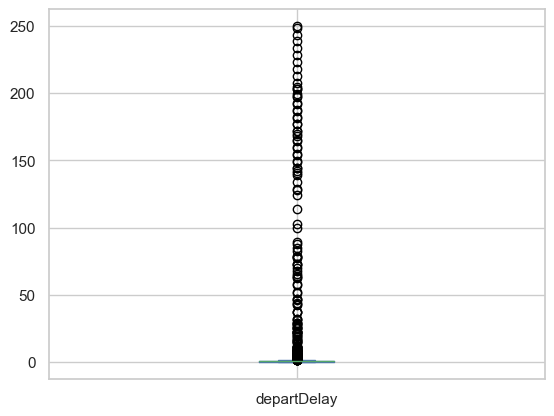

In [14]:
cleaned_data['departDelay'].plot(kind='box')


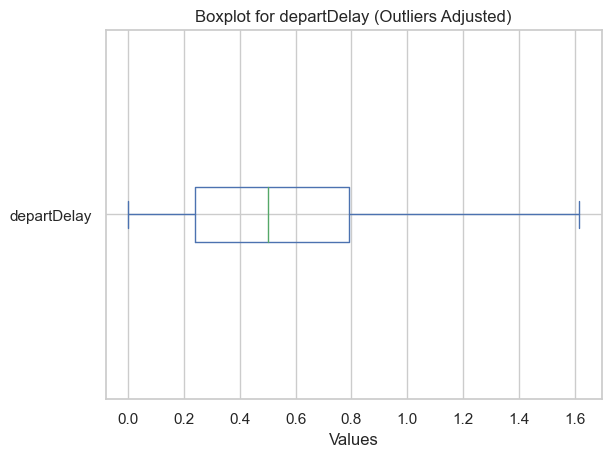

In [15]:
q1 = cleaned_data['departDelay'].quantile(0.25)
q3 = cleaned_data['departDelay'].quantile(0.75)
iqr = q3 - q1

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

cleaned_data.loc[cleaned_data['departDelay'] > upper, 'departDelay'] = upper
cleaned_data.loc[cleaned_data['departDelay'] < lower, 'departDelay'] = lower

cleaned_data['departDelay'].plot(kind='box', vert=False)
plt.title("Boxplot for departDelay (Outliers Adjusted)")
plt.xlabel("Values")
plt.show()


<Axes: >

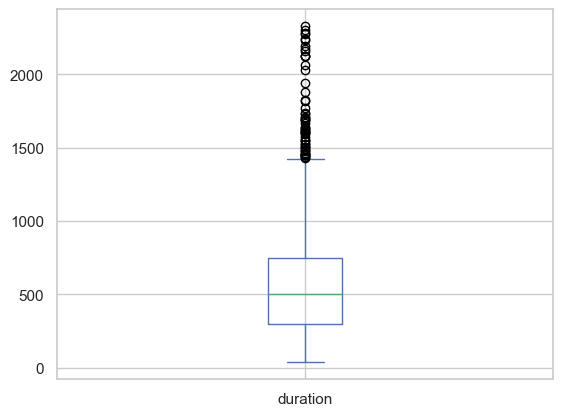

In [16]:
cleaned_data['duration'].plot(kind='box')


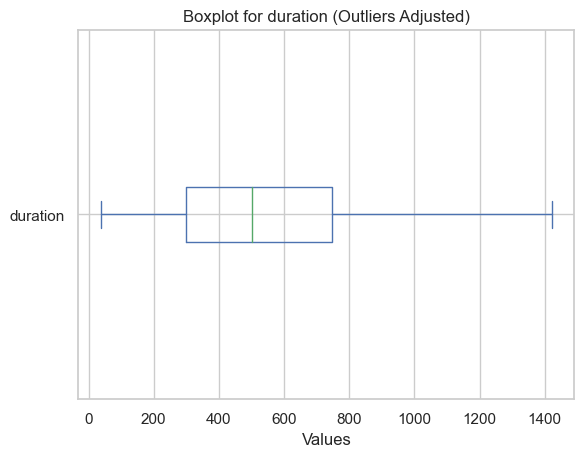

In [17]:
# Calculate Q1, Q3, and IQR for duration
q1 = cleaned_data['duration'].quantile(0.25)
q3 = cleaned_data['duration'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

cleaned_data.loc[cleaned_data['duration'] > upper, 'duration'] = upper
cleaned_data.loc[cleaned_data['duration'] < lower, 'duration'] = lower

cleaned_data['duration'].plot(kind='box', vert=False)
plt.title("Boxplot for duration (Outliers Adjusted)")
plt.xlabel("Values")
plt.show()


<Axes: >

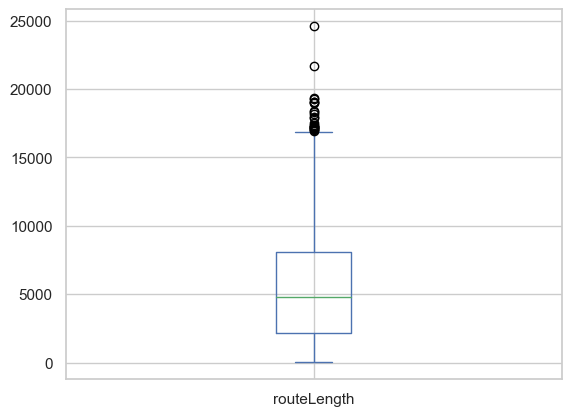

In [18]:
cleaned_data['routeLength'].plot(kind='box')


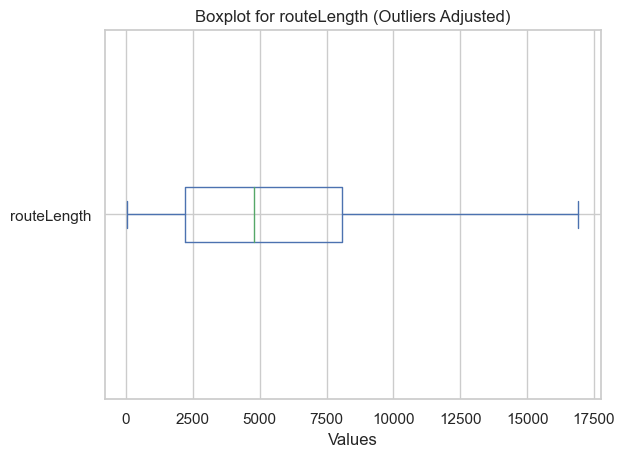

In [19]:
# Calculate Q1, Q3, and IQR for routeLength
q1 = cleaned_data['routeLength'].quantile(0.25)
q3 = cleaned_data['routeLength'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

cleaned_data.loc[cleaned_data['routeLength'] > upper, 'routeLength'] = upper
cleaned_data.loc[cleaned_data['routeLength'] < lower, 'routeLength'] = lower

cleaned_data['routeLength'].plot(kind='box', vert=False)
plt.title("Boxplot for routeLength (Outliers Adjusted)")
plt.xlabel("Values")
plt.show()


<Axes: >

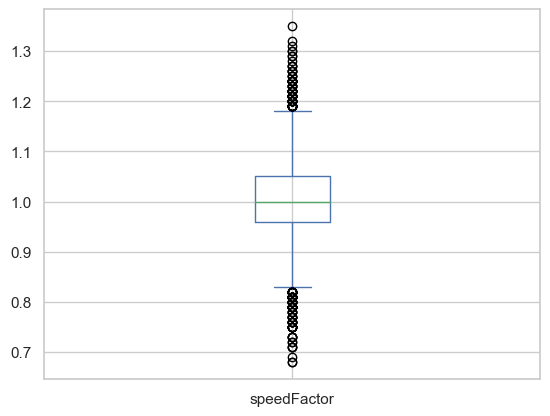

In [20]:
cleaned_data['speedFactor'].plot(kind='box')


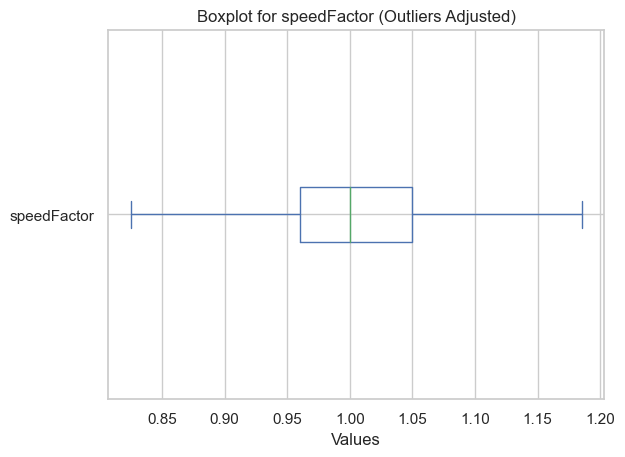

In [21]:
q1 = cleaned_data['speedFactor'].quantile(0.25)
q3 = cleaned_data['speedFactor'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

cleaned_data.loc[cleaned_data['speedFactor'] > upper, 'speedFactor'] = upper
cleaned_data.loc[cleaned_data['speedFactor'] < lower, 'speedFactor'] = lower

cleaned_data['speedFactor'].plot(kind='box', vert=False)
plt.title("Boxplot for speedFactor (Outliers Adjusted)")
plt.xlabel("Values")
plt.show()


<Axes: >

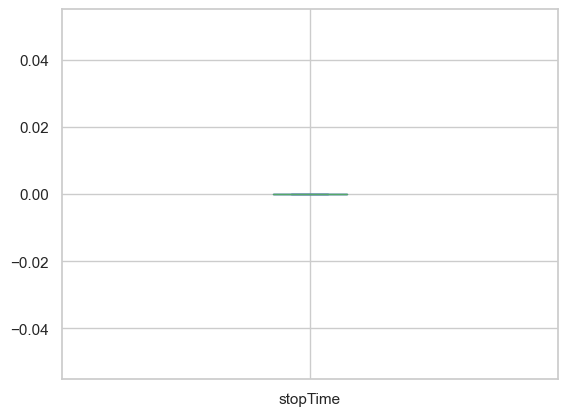

In [22]:
cleaned_data['stopTime'].plot(kind='box')


<Axes: >

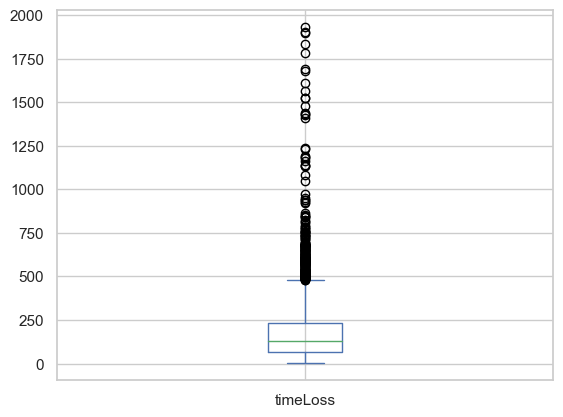

In [23]:
cleaned_data['timeLoss'].plot(kind='box')


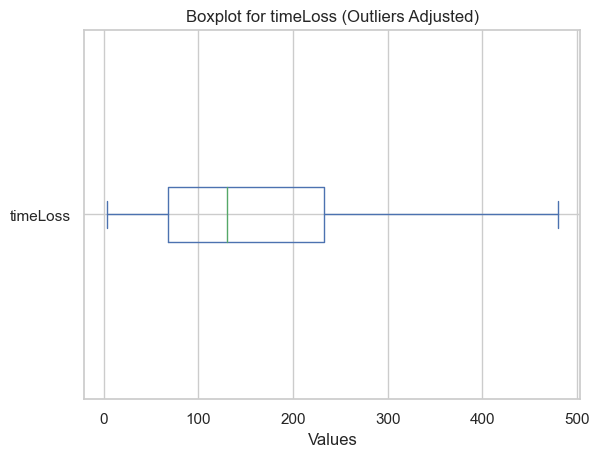

In [24]:
q1 = cleaned_data['timeLoss'].quantile(0.25)
q3 = cleaned_data['timeLoss'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

cleaned_data.loc[cleaned_data['timeLoss'] > upper, 'timeLoss'] = upper
cleaned_data.loc[cleaned_data['timeLoss'] < lower, 'timeLoss'] = lower

cleaned_data['timeLoss'].plot(kind='box', vert=False)
plt.title("Boxplot for timeLoss (Outliers Adjusted)")
plt.xlabel("Values")
plt.show()


<Axes: >

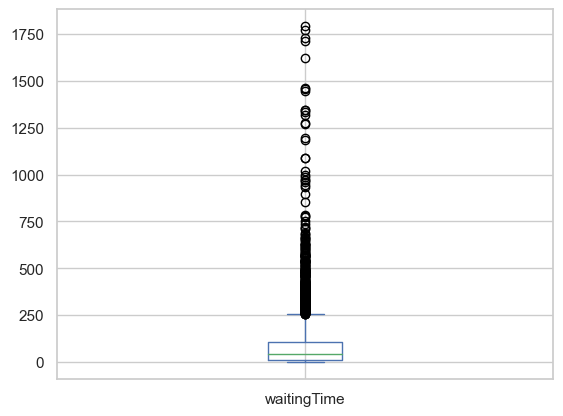

In [25]:
cleaned_data['waitingTime'].plot(kind='box')


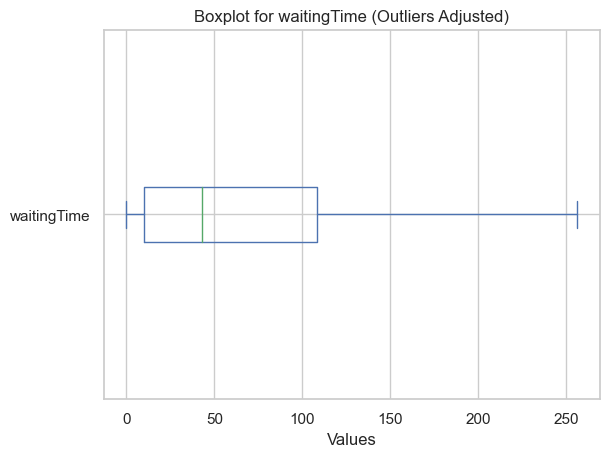

In [26]:
q1 = cleaned_data['waitingTime'].quantile(0.25)
q3 = cleaned_data['waitingTime'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

cleaned_data.loc[cleaned_data['waitingTime'] > upper, 'waitingTime'] = upper
cleaned_data.loc[cleaned_data['waitingTime'] < lower, 'waitingTime'] = lower

cleaned_data['waitingTime'].plot(kind='box', vert=False)
plt.title("Boxplot for waitingTime (Outliers Adjusted)")
plt.xlabel("Values")
plt.show()
